## **Project: Panel Data Methodologies With Application To Macroeconometrics (Inflation Forecasting)**.

> ### **Title**: Training, Evaluation and Comparison Model.


#### **Table of Contents:**
<ul>
<li><a href="#0"> Dataset Description and Variable Overview.</a></li>
<li><a href="#1">1. Split dataset.</a></li>
<li><a href="#2.A">2.A. Treaning  Pooled OLS model.</a></li>
<li><a href="#2.B">2.B. Treaning  Fixed Effects model.</a></li>
<li><a href="#2.C">2.C. Treaning  Random Effects model.</a></li>
<li><a href="#3.A">3.A. Wald test: Pooled OLS vs Fixed Effects.</a></li>
<li><a href="#3.B">3.B. Hausman test: fixed vs random effects</a></li>
<li><a href="#4.A">4.A. Heteroskedasticity tests.</a></li>
<li><a href="#4.B">4.B. Serial Correlation test.</a></li>
<li><a href="#4.C">4.C. Test Pesaran CD.</a></li>
<li><a href="#4.D">4.D. test Levin, Lin & Chu.</a></li>
<li><a href="#4.E">4.E. Correcting standard error.</a></li>
<li><a href="#5">5. the Dynamic Panel (GMM) model.</a></li>
<li><a href="#5.A">5.A. Build the formula string.</a></li>
<li><a href="#5.B">5.B. Estimate the GMM model.</a></li>
<li><a href="#5.C">5.C. Diagnostics for the Difference GMM model.</a></li>
<li><a href="#">.</a></li>

</ul>




<a id='1'></a>

#### Dataset Description and Variable Overview:

The dataset includes annual macroeconomic data for  **77 countries** over the period **1980–2024**. Most variables are sourced from the **IMF’s World Economic Outlook (WEO)**, except **TRWMA**, which is derived from the **World Bank**. The target variable is **PCPIPCH** (Inflation, average consumer prices). Below is the list of variables used:

---

> #### **Inflation & Price Stability**

| **Variable Code** | **Description**                                    | **Units**                                         |
| ----------------- | -------------------------------------------------- | ------------------------------------------------- |
| **PCPIPCH**       | Inflation, average consumer prices `(Target)`      | Percent change                                    |

---

> #### **Public Finance**
| **Variable Code** | **Description**                                    | **Units**                                         |
| ----------------- | -------------------------------------------------- | ------------------------------------------------- |
| GGSB_NPGDP        | General government structural balance              | Percent of potential GDP                          |
| GGXWDG_NGDP       | General government gross debt                      | Percent of GDP                                    |

---


> #### **Economic Output & Productivity**
| **Variable Code** | **Description**                                    | **Units**                                         |
| ----------------- | -------------------------------------------------- | ------------------------------------------------- |
| PPPPC             | Gross domestic product per capita, current prices  | Purchasing power parity; international dollars    |

---

> #### **International Trade & Balance**
| **Variable Code** | **Description**                                    | **Units**                                         |
| ----------------- | -------------------------------------------------- | ------------------------------------------------- |
| TX_RPCH           | Volume of exports of goods and services            | Percent change                                    |
| TM_RPCH           | Volume of imports of goods and services            | Percent change                                    |
---

> #### **Savings & Investment **
| **Variable Code** | **Description**                                    | **Units**                                         |
| ----------------- | -------------------------------------------------- | ------------------------------------------------- |
| NID_NGDP          | Total investment                                   | Percent of GDP                                    |

---

> #### **Country Metadata**

| **Variable Code** | **Description**                                    | **Units**                                         |
| ----------------- | -------------------------------------------------- | ------------------------------------------------- |
| Country_Code      | ID number for each country                         | ID                                                |
| Country           | Name of 70 countries                               | String                                            |
| Advanced_Country  | Is the country developed (1) or developing (0)?    | Boolean                                           |
| Years             | date from 2000 to 2024                             | Date                                              |

---


#### **1. Inflation & Price Stability (التضخم واستقرار الأسعار)**

| Variable Code    | Term             | التفسير |                تأثيره على التضخم                                            |
| ---------------- | ---------------- | --------------------------------- | --------------------------------------------------- |
| **PCPIPCH**   | Inflation (CPI) | معدل التضخم بناءً على متوسط أسعار المستهلكين؛ مؤشر رئيسي لاستقرار الأسعار. | المتغير الهدف، ويقيس بشكل مباشر مدى ارتفاع الأسعار. |

---

#### **2. Public Finance (المالية العامة)**

| Variable Code    | Term             | التفسير |                تأثيره على التضخم                                            |
| ---------------- | ---------------- | --------------------------------- | --------------------------------------------------- |
| **GGSB_NPGDP**  | Structural Budget Balance         | الميزان الهيكلي بعد خصم أثر الدورة الاقتصادية.                         | الفائض الهيكلي يُعتبر إشارة إلى سياسة مالية انكماشية تقلل من التضخم.      |
| **GGXWDG_NGDP** | Gross Government Debt (% of GDP)  | الدين العام كنسبة من الناتج؛ يعكس عبء الحكومة المالي.                  | ارتفاع الدين قد يُجبر الحكومة على التوسع النقدي مستقبلاً مما يزيد التضخم. |


---


#### **3. Economic Output & Productivity (الإنتاجية والناتج الاقتصادي)**

| Variable Code    | Term             | التفسير |                تأثيره على التضخم                                            |
| ---------------- | ---------------- | --------------------------------- | --------------------------------------------------- |
| **PPPPC**      | GDP per Capita (PPP)   | نصيب الفرد من الناتج باستخدام تعادل القوة الشرائية.             | ارتفاعه يشير إلى قدرة شرائية أعلى، ما قد يدفع بالأسعار إلى الارتفاع.               |

---


#### **4. International Trade & Balance (التجارة الدولية والحساب الجاري)**

| Variable Code    | Term             | التفسير |                تأثيره على التضخم                                            |
| ---------------- | ---------------- | --------------------------------- | --------------------------------------------------- |
| **TX_RPCH**   | Export Volume Growth            | نمو حجم الصادرات.                   | زيادة الصادرات قد تقلل المعروض المحلي وترفع الأسعار.                |
| **TM_RPCH**   | Import Volume Growth            | نمو حجم الواردات.                   | زيادة الواردات توفر بدائل أرخص وتقلل من التضخم.                     |

---

#### **5. Savings & Investment (الادخار والاستثمار)**

| Variable Code    | Term             | التفسير |                تأثيره على التضخم                                            |
| ---------------- | ---------------- | --------------------------------- | --------------------------------------------------- |
| **NID_NGDP**  | Gross Capital Formation | الاستثمار الإجمالي كنسبة من الناتج. | استثمار أكبر قد يرفع الإنتاج في الأجل الطويل مما يقلل التضخم. |

---

#### **6. Country Metadata (بيانات الدول)**

| Variable Code    | Term             | التفسير |                تأثيره على التضخم                                            |
| ---------------- | ---------------- | --------------------------------- | --------------------------------------------------- |
| **Country_Code**     | Country ID         | معرف رقمي فريد لكل دولة. | -                 |
| **Country**           | Country Name       | اسم الدولة.              | -                 |
| **Advanced_Country** | Development Status | متقدمة (1) أو نامية (0). | -                 |
| **Years**             | Year               | السنة ما بين 2000 و2024. | -                 |

---



In [1]:
#install.packages("modelsummary")

**Import Library**

In [3]:
# Load required libraries
library(dplyr)
library(readxl)
library(car)
library(gplots)
library(plm)

library(tidyverse)
library(corrplot)

library(Metrics)  # for rmse
library(caret)    # for R-squared
library(lmtest)


library(sandwich)

library(urca) # test Levin, Lin & Chu

library(AER)      # for Hausman test


**Load Dataset**

In [4]:

# Load the dataset.
df <- read.csv("../02-Dataset/01.3-Data_Clean.csv")

# Display the first 5 rows of data.
dim(df)
head(df)

[1] 3735   11

,WEO_Country_Code,Country,Advanced_Country,Year,PCPIPCH,GGSB_NPGDP,GGXWDG_NGDP,PPPPC,TX_RPCH,TM_RPCH,NID_NGDP
,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,614,Angola,0,1980,46.708,1.369655,46.347761,1510.407,-3.0,-39.0,12.122
2,614,Angola,0,1981,1.391,1.346576,4.311144,1538.971,8.0,17.3,13.148
3,614,Angola,0,1982,1.833,1.316141,20.616131,1591.954,-12.9,1.7,14.916
4,614,Angola,0,1983,1.833,1.262721,14.596401,1679.796,4.6,-2.7,12.381
5,614,Angola,0,1984,1.833,1.191218,9.758854,1797.332,12.5,2.2,12.347
6,614,Angola,0,1985,1.833,1.249193,20.533547,1703.032,-5.9,-9.4,9.450


In [5]:
# Drop "WEO_Country_Code"
df$WEO_Country_Code <- NULL

str(df)

'data.frame':	3735 obs. of  10 variables:
 $ Country         : chr  "Angola" "Angola" "Angola" "Angola" ...
 $ Advanced_Country: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Year            : int  1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 ...
 $ PCPIPCH         : num  46.71 1.39 1.83 1.83 1.83 ...
 $ GGSB_NPGDP      : num  1.37 1.35 1.32 1.26 1.19 ...
 $ GGXWDG_NGDP     : num  46.35 4.31 20.62 14.6 9.76 ...
 $ PPPPC           : num  1510 1539 1592 1680 1797 ...
 $ TX_RPCH         : num  -3 8 -12.9 4.6 12.5 -5.9 -33.8 54.3 7 2.7 ...
 $ TM_RPCH         : num  -39 17.3 1.7 -2.7 2.2 -9.4 -6.5 -1.5 26.9 -22 ...
 $ NID_NGDP        : num  12.1 13.1 14.9 12.4 12.3 ...


In [6]:
### Display Descriptive Statistics
summary(df)


   Country          Advanced_Country      Year         PCPIPCH        
 Length:3735        Min.   :0.0000   Min.   :1980   Min.   : -86.089  
 Class :character   1st Qu.:0.0000   1st Qu.:1991   1st Qu.:   2.070  
 Mode  :character   Median :0.0000   Median :2002   Median :   4.185  
                    Mean   :0.4337   Mean   :2002   Mean   :  24.608  
                    3rd Qu.:1.0000   3rd Qu.:2013   3rd Qu.:   9.293  
                    Max.   :1.0000   Max.   :2024   Max.   :7481.691  
   GGSB_NPGDP         GGXWDG_NGDP           PPPPC             TX_RPCH         
 Min.   :-947.6097   Min.   :-3746.85   Min.   :   274.6   Min.   :-175.0328  
 1st Qu.:  -4.1904   1st Qu.:   29.37   1st Qu.:  7667.6   1st Qu.:   0.5745  
 Median :  -2.1580   Median :   46.00   Median : 14819.9   Median :   5.1890  
 Mean   :  -2.8788   Mean   :   58.63   Mean   : 20692.3   Mean   :   4.6383  
 3rd Qu.:  -0.1656   3rd Qu.:   68.77   3rd Qu.: 28010.8   3rd Qu.:   9.5619  
 Max.   : 125.1350   Max.   :

In [7]:
# panel data
panel_df <- pdata.frame(df, index = c("Country", "Year"))
head(panel_df)


,Country,Advanced_Country,Year,PCPIPCH,GGSB_NPGDP,GGXWDG_NGDP,PPPPC,TX_RPCH,TM_RPCH,NID_NGDP
,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Angola-1980,Angola,0,1980,46.708,1.369655,46.347761,1510.407,-3.0,-39.0,12.122
Angola-1981,Angola,0,1981,1.391,1.346576,4.311144,1538.971,8.0,17.3,13.148
Angola-1982,Angola,0,1982,1.833,1.316141,20.616131,1591.954,-12.9,1.7,14.916
Angola-1983,Angola,0,1983,1.833,1.262721,14.596401,1679.796,4.6,-2.7,12.381
Angola-1984,Angola,0,1984,1.833,1.191218,9.758854,1797.332,12.5,2.2,12.347
Angola-1985,Angola,0,1985,1.833,1.249193,20.533547,1703.032,-5.9,-9.4,9.450


In [8]:
# # Apply log transformation: log((x + 1) - min(x)) within each country
# panel_df <- panel_df %>%
#   group_by(Country) %>%
#   mutate(
#     PCPIPCH = log((PCPIPCH + 1) - min(PCPIPCH))
#   ) %>%
#   ungroup()

# # Summary statistics
# summary(panel_df$PCPIPCH)

# #    of PCPIPCH within each country
# panel_df <- panel_df %>%
#   group_by(Country) %>%
#   mutate(PCPIPCH_diff = diff(x)
# # View result
# summary(panel_df$PCPIPCH_diff)

<a id='1'></a>

### **1. Split dataset:**

In [9]:
# ========== Split data for out-of-sample forecasting ==========
# Define dependent and independent variables
y <- panel_df[,'PCPIPCH']  # Inflation Rate (Consumer Prices, annual %)
X_vars <- c(

    # 2. Public Finance

    "GGSB_NPGDP",   ## General government structural balance
    "GGXWDG_NGDP",  # General government gross debt (% of GDP)

    
    # 3. Economic Output & Productivity & Exchange & Purchasing Power
    "PPPPC",        # GDP per capita based on PPP
    

    # 4. International Trade & Balance
    "TX_RPCH",      # Export volume growth
    "TM_RPCH",     ## Import volume growth


    # 5. Savings & Investment
    #"NGSD_NGDP",    ## Net government saving (% of GDP)
    "NID_NGDP",     ## Investment (% of GDP)
    
    # 6. Metadata
   "Advanced_Country"
    
)

X <- panel_df[, X_vars]

# Define evaluation function (RMSE and R-squared)
evaluate <- function(y_true, y_pred) {
  rmse <- sqrt(mean((y_true - y_pred)^2))                  # Root Mean Squared Error
  ss_total <- sum((y_true - mean(y_true))^2)               # Total Sum of Squares
  ss_res <- sum((y_true - y_pred)^2)                       # Residual Sum of Squares
  r2 <- 1 - (ss_res / ss_total)                            # R-squared
  return(list(rmse = rmse, r2 = r2))
}


In [10]:
# Convert Year to numeric to allow comparison
panel_df$Year <- as.numeric(as.character(panel_df$Year))

# Split data into train and test
train <- panel_df %>% 
  as.data.frame() %>%
  filter(Year <= 2024) %>%
  pdata.frame(index = c("Country", "Year"))

test <- panel_df %>% 
  as.data.frame() %>%
  filter(Year >= 2015) %>%
  pdata.frame(index = c("Country", "Year"))

# Define dependent and independent variables
y_train <- train$PCPIPCH
X_train <- train[, X_vars]

y_test <- test$PCPIPCH
X_test <- test[, X_vars]

# Combine y and X for training model
train_model_df <- train[, c("PCPIPCH", X_vars)]

test_model_df <- test[, c("PCPIPCH", X_vars)]


<a id='2.A'></a>

### **2.A. Treaning  Pooled OLS model:**


In [11]:
# ===============================
# A. Pooled OLS model

# Create formula for model
formula_str <- as.formula(paste("PCPIPCH ~ -1 +", paste(X_vars, collapse = " + ")))

#  Fit Pooled OLS model
pooled_model <- plm(formula_str, data = train_model_df, model = "pooling", index = c("Country", "Year"))

# Display model summary
summary(pooled_model)

# Predict using the model
pooled_preds <- predict(pooled_model, newdata = X_test)

# Evaluate model performance
pooled_rmse <- rmse(y_test, pooled_preds)
pooled_r2   <- R2( y_test, pooled_preds)

# Print results
cat(sprintf("Pooled OLS RMSE (out-of-sample): %.4f\n", pooled_rmse))
cat(sprintf("Pooled OLS R² (out-of-sample): %.4f\n", pooled_r2))


Pooling Model

Call:
plm(formula = formula_str, data = train_model_df, model = "pooling", 
    index = c("Country", "Year"))

Balanced Panel: n = 83, T = 45, N = 3735

Residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -217.6   -27.2   -11.4     0.9     6.2  4673.4 

Coefficients:
                    Estimate  Std. Error  t-value  Pr(>|t|)    
GGSB_NPGDP       -4.0484e+00  3.1783e-01 -12.7379 < 2.2e-16 ***
GGXWDG_NGDP       3.2163e-01  2.6201e-02  12.2756 < 2.2e-16 ***
PPPPC            -3.0971e-04  1.5845e-04  -1.9546 0.0507057 .  
TX_RPCH          -2.1189e-03  2.1513e-01  -0.0098 0.9921419    
TM_RPCH           7.3398e-01  2.0216e-01   3.6306 0.0002866 ***
NID_NGDP          1.8201e-01  1.5135e-01   1.2025 0.2292347    
Advanced_Country -1.9344e+01  6.2825e+00  -3.0790 0.0020924 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    156340000
Residual Sum of Squares: 85592000
R-Squared:      0.45253
Adj. R-Squared: 0.45165
F-statistic

Pooled OLS RMSE (out-of-sample): 29.9687
Pooled OLS R² (out-of-sample): 0.0192


<a id='2.B'></a>

### **2.B. Treaning  Fixed Effects model:**

In [12]:
if ("Advanced_Country" %in% colnames(X_train)) {
  X_train <- X_train[, !colnames(X_train) %in% "Advanced_Country"]
}

if ("Advanced_Country" %in% colnames(X_test)) {
  X_test <- X_test[, !colnames(X_test) %in% "Advanced_Country"]
}

if ("Advanced_Country" %in% colnames(train_model_df)) {
  train_model_df <- train_model_df[, !colnames(train_model_df) %in% "Advanced_Country"]
}
if ("Advanced_Country" %in% colnames(test_model_df)) {
  test_model_df <- test_model_df[, !colnames(test_model_df) %in% "Advanced_Country"]
}

X_vars <- setdiff(X_vars, "Advanced_Country")


# Create formula for model
formula_str <- as.formula(paste("PCPIPCH ~ -1 +", paste(X_vars, collapse = " + " )))


In [13]:
# ===============================
# B. Fixed Effects model

# Fit Fixed Effects (within)
fe_model <- plm(formula_str, data = train_model_df, model = "within", index = c("Country", "Year"))

# Display model summary
summary(fe_model)

# Predict using the model
fe_preds <- predict(fe_model, newdata = X_test)

# Evaluate model performance

fe_rmse <- rmse(y_test, fe_preds)
fe_r2   <- R2( y_test,fe_preds)

# Print results
cat(sprintf("Fixed Effects RMSE (out-of-sample): %.4f\n", fe_rmse))
cat(sprintf("Fixed Effects R² (out-of-sample): %.4f\n", fe_r2))


Oneway (individual) effect Within Model

Call:
plm(formula = formula_str, data = train_model_df, model = "within", 
    index = c("Country", "Year"))

Balanced Panel: n = 83, T = 45, N = 3735

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-274.2957  -13.7988   -1.1049    8.4419 4503.3152 

Coefficients:
               Estimate  Std. Error  t-value  Pr(>|t|)    
GGSB_NPGDP  -4.20662575  0.33142670 -12.6925 < 2.2e-16 ***
GGXWDG_NGDP  0.31689675  0.02740521  11.5634 < 2.2e-16 ***
PPPPC       -0.00062272  0.00018435  -3.3779 0.0007380 ***
TX_RPCH      0.03205378  0.22116789   0.1449 0.8847745    
TM_RPCH      0.76946904  0.20316750   3.7874 0.0001547 ***
NID_NGDP    -0.27179001  0.43774941  -0.6209 0.5347172    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    144410000
Residual Sum of Squares: 76733000
R-Squared:      0.46864
Adj. R-Squared: 0.45582
F-statistic: 535.948 on 6 and 3646 DF, p-value: < 2.22e-16

Fixed Effects RMSE (out-of-sample): 52.8248
Fixed Effects R² (out-of-sample): 0.0228


<a id='2.C'></a>

### **2.C. Treaning  Random Effects model:**

In [14]:
# ===============================
# C. Random Effects model


# Step 2: Fit Random Effects model using plm
re_model <- plm(formula_str, data = train_model_df, model = "random", index = c("Country", "Year"))

# re_model <- plm(formula_str, data = train_model_df, model = "random", 
#                 random.method = "amemiya", index = c("Country", "Year"))

# re_model <- plm(formula_str, data = train_model_df, model = "random", 
#                 random.method = "walhus", index = c("Country", "Year"))

# Step 3: Display model summary
summary(re_model)

# Step 4: Predict using the model
re_preds <- predict(re_model, newdata = X_test)

# Step 5: Evaluate model performance
re_rmse <- rmse(y_test, re_preds)
re_r2   <- R2( y_test, re_preds)

# Step 6: Print results
cat(sprintf("Random Effects RMSE (out-of-sample): %.4f\n", re_rmse))
cat(sprintf("Random Effects R² (out-of-sample): %.4f\n", re_r2))


Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = formula_str, data = train_model_df, model = "random", 
    index = c("Country", "Year"))

Balanced Panel: n = 83, T = 45, N = 3735

Effects:
                   var  std.dev share
idiosyncratic 21045.69   145.07 0.909
individual     2111.90    45.96 0.091
theta: 0.5742

Residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -191.1   -18.6    -6.4     0.9     5.5  4577.0 

Coefficients:
               Estimate  Std. Error  z-value  Pr(>|z|)    
GGSB_NPGDP  -4.15466064  0.32538128 -12.7686 < 2.2e-16 ***
GGXWDG_NGDP  0.32003797  0.02687020  11.9105 < 2.2e-16 ***
PPPPC       -0.00059052  0.00015733  -3.7534 0.0001744 ***
TX_RPCH      0.01689206  0.21776416   0.0776 0.9381697    
TM_RPCH      0.75983554  0.20113762   3.7777 0.0001583 ***
NID_NGDP     0.00216012  0.23012417   0.0094 0.9925105    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares: 

Random Effects RMSE (out-of-sample): 28.3358
Random Effects R² (out-of-sample): 0.0081


<a id='3.A'></a>

### **3.A. Wald test: Pooled OLS vs Fixed Effects:**

In [15]:
# ===============================
# Wald test: Pooled OLS vs Fixed Effects (joint significance of entity effects)
# ===============================

comparison <- waldtest(pooled_model, fe_model, test = "F")
cat("Wald Test (F-test) for joint significance of entity effects:\n")
comparison

# Extract p-value from the comparison table (last row, last column)
wald_pval <- comparison[2, "Pr(>F)"]

# Decision rule
if (wald_pval < 0.05) {
  cat("Wald test suggests Fixed Effects preferred.\n")
} else {
  cat("Wald test suggests Pooled OLS preferred.\n")
}


Wald Test (F-test) for joint significance of entity effects:


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,3728,NA,NA,NA
2,3646,-1,9.479994,0.002092365


Wald test suggests Fixed Effects preferred.


<a id='3.B'></a>

### **3.B. Hausman test: fixed vs random effects:**

In [16]:
# ===============================
# Hausman test: fixed vs random effects
hausman_test <- phtest(fe_model, re_model)
print(hausman_test)

haus_pval <- hausman_test$p.value

if (haus_pval < 0.05) {
  cat("Hausman test suggests Fixed Effects preferred.\n")
} else {
  cat("Hausman test suggests Random Effects preferred.\n")
}


	Hausman Test

data:  formula_str
chisq = 2.5778, df = 6, p-value = 0.8597
alternative hypothesis: one model is inconsistent

Hausman test suggests Random Effects preferred.


<a id='4.A'></a>

### **4.A. Heteroskedasticity tests :**

In [17]:
# ===============================
# A. Heteroskedasticity tests (Breusch-Pagan and White on residuals)

print("Breusch-Pagan and White Test for Heteroskedasticity:")

# Breusch-Pagan Test
bp_test <- bptest(re_model)
cat(sprintf("Breusch-Pagan test: stat=%.4f, p-value=%.4f\n", bp_test$statistic, bp_test$p.value))

# White Test (using quadratic interactions)
fe_residuals <- residuals(re_model)

white_test <- bptest(lm(fe_residuals^2 ~ ., data = train_model_df[, X_vars]))
cat(sprintf("White test: stat=%.4f, p-value=%.4f\n", white_test$statistic, white_test$p.value))

# Decision rule
if (bp_test$p.value < 0.05 | white_test$p.value < 0.05) {
  cat("Heteroskedasticity detected: consider robust standard errors.\n")
} else {
  cat("No significant heteroskedasticity detected.\n")
}

[1] "Breusch-Pagan and White Test for Heteroskedasticity:"
Breusch-Pagan test: stat=13.6197, p-value=0.0182


White test: stat=18.0071, p-value=0.0062
Heteroskedasticity detected: consider robust standard errors.


<a id='4.B'></a>

### **4.B. Serial Correlation test:**

In [18]:
# ===============================
# B. Serial Correlation test (Breusch-Godfrey) residuals

bg_test <- pbgtest(re_model)
print("Breusch-Godfrey/Wooldridge test for Serial Correlation:")
bg_test


[1] "Breusch-Godfrey/Wooldridge test for Serial Correlation:"



	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  formula_str
chisq = 751.38, df = 45, p-value < 2.2e-16
alternative hypothesis: serial correlation in idiosyncratic errors


<a id='4.C'></a>

### **4.C. Test Pesaran CD:**

In [19]:
# Test Pesaran CD
pcdtest(re_model, test = "cd")


	Pesaran CD test for cross-sectional dependence in panels

data:  PCPIPCH ~ -1 + GGSB_NPGDP + GGXWDG_NGDP + PPPPC + TX_RPCH + TM_RPCH +     NID_NGDP
z = 22.653, p-value < 2.2e-16
alternative hypothesis: cross-sectional dependence


<a id='4.D'></a>

### **4.D. test Levin, Lin & Chu:**

In [20]:
# test Levin, Lin & Chu
llc_test <- purtest(panel_df$PCPIPCH, test = "levinlin")
summary(llc_test)


Levin-Lin-Chu Unit-Root Test 
Exogenous variables: None 
Automatic selection of lags using SIC: 0 - 10 lags (max: 10)
statistic: -20.159 
p-value: 0 

                         lags obs         rho       trho       p.trho
Angola                      0  44 -0.40021247 -3.3178554 8.878553e-04
Argentina                   0  44  0.14530149  1.8161629 9.838137e-01
Australia                   0  44 -0.11195443 -2.0808989 3.596249e-02
Austria                     2  42 -0.10255813 -1.3407712 1.671187e-01
Barbados                    0  44 -0.27536168 -3.7722649 1.616201e-04
Belarus                     0  44 -0.31332881 -2.8692742 4.004519e-03
Belgium                     2  42 -0.19687123 -2.1741055 2.859874e-02
Bosnia and Herzegovina      0  44 -0.43536688 -3.5024826 4.539668e-04
Botswana                    0  44 -0.06018470 -1.3985521 1.509864e-01
Brazil                      6  38 -0.31107228 -2.0689221 3.701596e-02
Bulgaria                    0  44 -0.83398832 -5.6198207 3.414318e-08
Canada   

<a id='4.E'></a>

### **4.E. Correcting standard error:**

In [21]:
# # Correcting standard error using Driscoll-Kraay (SCC) estimator:
# This method corrects for heteroskedasticity, serial correlation, 
# and cross-sectional dependence — all of which were detected in the diagnostic tests.
robust_se_scc <- vcovSCC(re_model, type = "HC1")

# Testing significance using corrected standard error
coeftest(re_model, vcov = robust_se_scc)



t test of coefficients:

               Estimate  Std. Error t value Pr(>|t|)   
GGSB_NPGDP  -4.15466064  4.35426172 -0.9542 0.340065   
GGXWDG_NGDP  0.32003797  0.38639373  0.8283 0.407571   
PPPPC       -0.00059052  0.00020310 -2.9075 0.003665 **
TX_RPCH      0.01689206  0.24146673  0.0700 0.944232   
TM_RPCH      0.75983554  0.24878611  3.0542 0.002273 **
NID_NGDP     0.00216012  0.60999807  0.0035 0.997175   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


<a id='5.C'></a>

### **5.C. Diagnostics for the Difference GMM model:**


<a id='5.'></a>

## **5. the Dynamic Panel (GMM) model:**

<a id='5.A'></a>

### **5.A. Build the formula string:**

In [22]:
# Build the dynamic panel formula:
# The left-hand side of the formula includes:
# - lagged dependent variable: lag(PCPIPCH, 1)
# - contemporaneous exogenous variables: fiscal, trade, and income predictors
# The right-hand side of the formula provides instruments:
# - lagged inflation from period 2 to 7 as instruments

dynamic_formula <- as.formula(
  paste0("PCPIPCH ~ lag(PCPIPCH, 1) + ",
         paste(X_vars, collapse = " + "), 
         " | lag(PCPIPCH, 2:7)")
)

<a id='5.B'></a>

### **5.B. Estimate the GMM model:**

In [23]:
# ──────────────────────────────────────────────────────────────────────────────
# Estimate the GMM model (difference GMM (Arellano–Bond))
# ──────────────────────────────────────────────────────────────────────────────
gmm_model <- pgmm(
  formula         = dynamic_formula,
  data            = panel_df,
  effect          = "individual",      # panel-level fixed effect
  model           = "twosteps",        # two-step GMM estimation
  transformation  = "ld",              # first-differenced transformation
  collapse        = TRUE               # instrument collapsing for efficiency
)

# Summarize model output
summary(gmm_model)

Warning message in vcovHC.pgmm(object):
"a general inverse is used"


Oneway (individual) effect Two-steps model System GMM 

Call:
pgmm(formula = dynamic_formula, data = panel_df, effect = "individual", 
    model = "twosteps", collapse = TRUE, transformation = "ld")

Balanced Panel: n = 83, T = 45, N = 3735

Number of Observations Used: 7044
Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-5032.789   -10.749    -0.409     2.396     7.206  4639.103 

Coefficients:
                  Estimate Std. Error z-value Pr(>|z|)   
lag(PCPIPCH, 1)  0.2740680  0.0936327  2.9271 0.003422 **
GGSB_NPGDP      -3.2432799  1.4749911 -2.1988 0.027889 * 
GGXWDG_NGDP      0.2870040  0.1456152  1.9710 0.048727 * 
PPPPC           -0.0002192  0.0001943 -1.1281 0.259270   
TX_RPCH          0.2467464  0.3035139  0.8130 0.416238   
TM_RPCH          0.5278181  0.2599239  2.0307 0.042289 * 
NID_NGDP        -0.5357864  0.3328519 -1.6097 0.107467   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Sargan test: chisq(12) = 11.86007 (p-value =

<a id='5.C'></a>

### **5.C. Diagnostics for the Difference GMM model:**

In [24]:
# ──────────────────────────────────────────────────────────────────────────────
# Diagnostics for the Difference GMM model
# ──────────────────────────────────────────────────────────────────────────────

# (i) Hansen/Sargan test for overid (validity of instruments) ((p > 0.05))
cat("Sargan test (overid):\n")
print(sargan(gmm_model))

# (ii) Arellano–Bond tests for autocorrelation in residuals

# AR(1) test: should reject (serial correlation expected)
cat("\nArellano–Bond AR(1) test:\n")
print(mtest(gmm_model, order = 1))

# AR(2) test: should not reject (no serial correlation expected(p > 0.05))
cat("\nArellano–Bond AR(2) test:\n")
print(mtest(gmm_model, order = 2))


Sargan test (overid):

	Sargan test

data:  dynamic_formula
chisq = 11.86, df = 12, p-value = 0.457
alternative hypothesis: overidentifying restrictions not valid


Arellano–Bond AR(1) test:

	Arellano-Bond autocorrelation test of degree 1

data:  dynamic_formula
normal = -0.99476, p-value = 0.3199
alternative hypothesis: autocorrelation present


Arellano–Bond AR(2) test:

	Arellano-Bond autocorrelation test of degree 2

data:  dynamic_formula
normal = -0.58182, p-value = 0.5607
alternative hypothesis: autocorrelation present



<a id='6.'></a>

### **6. residuals models:**

In [29]:
# Load required libraries
library(plm)
library(ggplot2)


In [50]:
# Get fitted values
fitted_vals <- fitted(gmm_model)
fitted_vals[,"Egypt"]

1982        1983        1984        1985        1986        1987 
  2.0525526   7.2456617   5.8705847  -0.1237790   0.6203776   0.8882286 
       1988        1989        1990        1991        1992        1993 
-10.2153860   0.2484847   6.5854109   9.5872268  -2.3428947  16.1763769 
       1994        1995        1996        1997        1998        1999 
-11.0078562 -26.1089921  33.5867915  -6.9663749  -8.1233641   0.6165311 
       2000        2001        2002        2003        2004        2005 
 -5.7473596   8.1932390 -12.1928019   9.0577631  14.7446592  -4.5086674 
       2006        2007        2008        2009        2010        2011 
-16.0809160 -12.3373323   7.2545373 -18.7322954   7.0413352   6.2747540 
       2012        2013        2014        2015        2016        2017 
  0.4659627  16.8641438  -9.1648881  16.6787042  -9.8422664  -2.4986923 
       2018        2019        2020        2021        2022        2023 
 -0.5349843  -9.7169077  -6.2618472  -2.3160502   9.8864947 -15.7275522 
       2024        1981        1982        1983        1984        1985 
 19.0365167  38.9629276  41.0154802  48.2611419  54.1317265  54.0079475 
       1986        1987        1988        1989        1990        1991 
 54.6283251  55.5165538  45.3011678  45.5496525  52.1350634  61.7222901 
       1992        1993        1994        1995        1996        1997 
 59.3793954  75.5557724  64.5479162  38.4389241  72.0257155  65.0593406 
       1998        1999        2000        2001        2002        2003 
 56.9359765  57.5525076  51.8051480  59.9983870  47.8055851  56.8633482 
       2004        2005        2006        2007        2008        2009 
 71.6080074  67.0993400  51.0184240  38.6810917  45.9356290  27.2033336 
       2010        2011        2012        2013        2014        2015 
 34.2446688  40.5194227  40.9853854  57.8495292  48.6846411  65.3633454 
       2016        2017        2018        2019        2020        2021 
 55.5210790  53.0223867  52.4874024  42.7704947  36.5086475  34.1925973 
       2022        2023        2024 
 44.0790920  28.3515398  47.3880565

In [40]:
# Get residuals
residuals_vals <- residuals(gmm_model)
residuals_vals$Egypt

1982        1983        1984        1985        1986        1987 
  2.4474474  -6.1636617  -4.7925847  -4.8282210  11.1716224   0.3967714 
       1988        1989        1990        1991        1992        1993 
  0.2153860   4.6955153  -5.4954109 -16.0692268   8.7478947 -26.2763769 
       1994        1995        1996        1997        1998        1999 
  9.0118562  26.4239921 -35.8527915   6.0383749   6.9973641  -1.9125311 
       2000        2001        2002        2003        2004        2005 
  4.8513596  -8.6252390  12.0338019  -7.9037631 -10.0056592   5.0606674 
       2006        2007        2008        2009        2010        2011 
 11.6699160  18.9273323  -6.3945373  23.1512954 -11.5443352  -6.8767540 
       2012        2013        2014        2015        2016        2017 
 -2.8299627 -18.6401438  12.3418881 -15.7837042   9.0662664  15.8206923 
       2018        2019        2020        2021        2022        2023 
 -2.1480157   2.7409077  -1.9131528   1.1160502  -5.8864947  31.6195522 
       2024        1981        1982        1983        1984        1985 
-10.1265167 -28.5629276 -26.1154802 -32.2791419 -37.0717265 -41.8999475 
       1986        1987        1988        1989        1990        1991 
-30.7283251 -30.3315538 -30.1161678 -25.4206525 -30.9160634 -46.9852901 
       1992        1993        1994        1995        1996        1997 
-38.2373954 -64.5137724 -55.5019162 -29.0779241 -64.9307155 -58.8923406 
       1998        1999        2000        2001        2002        2003 
-51.8949765 -53.8075076 -48.9561480 -57.5813870 -45.5475851 -53.4513482 
       2004        2005        2006        2007        2008        2009 
-63.4570074 -58.3963400 -46.7264240 -27.7990917 -34.1936290 -11.0423336 
       2010        2011        2012        2013        2014        2015 
-22.5866688 -29.4634227 -32.2933854 -50.9335292 -38.5916411 -54.3753454 
       2016        2017        2018        2019        2020        2021 
-45.3090790 -29.4883867 -31.6364024 -28.8954947 -30.8086475 -29.6925973 
       2022        2023        2024 
-35.5790920  -3.9595398 -14.0860565

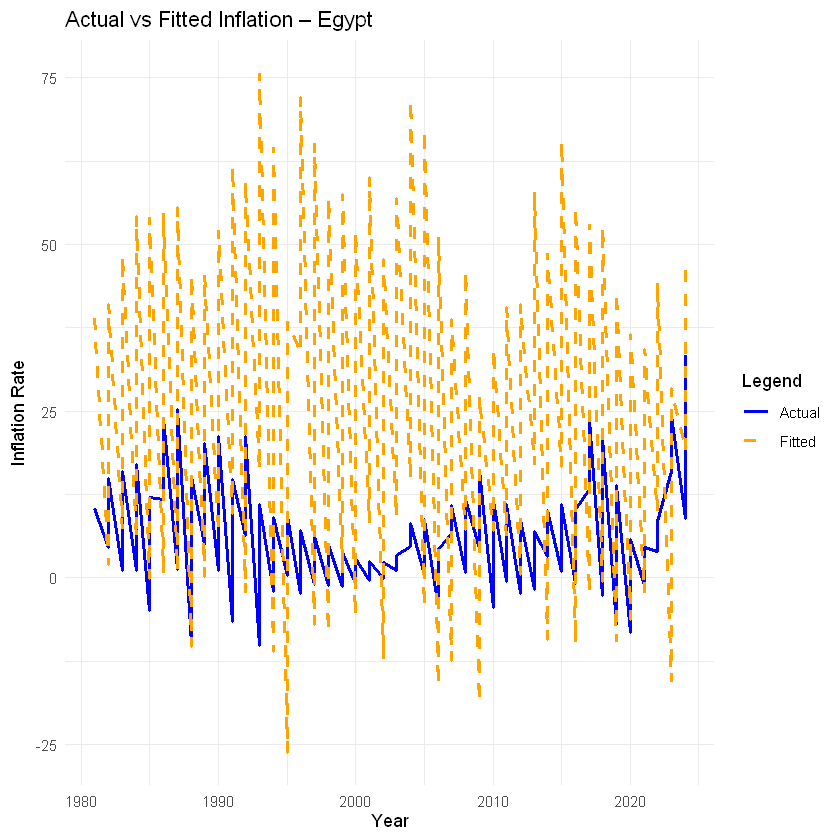

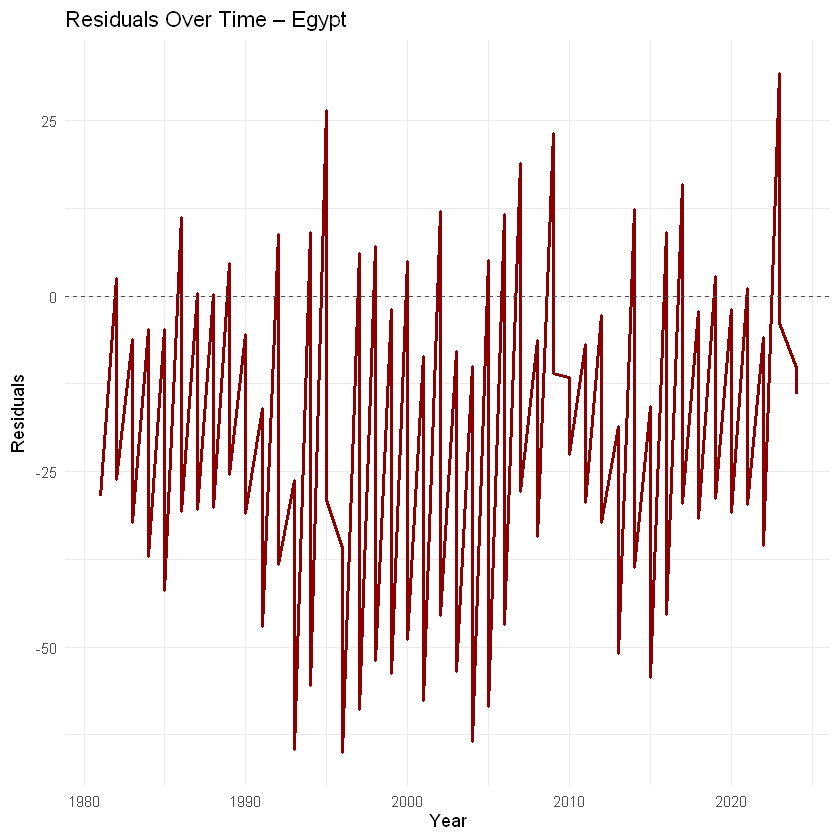

In [56]:
library(ggplot2)

# Extract Egypt-specific values
egypt_fitted    <- fitted(gmm_model)[, "Egypt"]
egypt_resid     <- residuals(gmm_model)$Egypt
egypt_actual    <- egypt_fitted + egypt_resid  # actual = fitted + residuals

# Extract years from names (assumes names are years)
years <- as.numeric(names(egypt_fitted))

# Create a data frame for plotting
egypt_df <- data.frame(
  Year      = years,
  Actual    = egypt_actual,
  Fitted    = as.numeric(egypt_fitted),
  Residuals = as.numeric(egypt_resid)
)

# ─────────────────────────────────────────────
# Plot 1: Actual vs Fitted values for Egypt
# ─────────────────────────────────────────────
ggplot(egypt_df, aes(x = Year)) +
  geom_line(aes(y = Actual, color = "Actual"), size = 1) +
  geom_line(aes(y = Fitted, color = "Fitted"), size = 1, linetype = "dashed") +
  labs(
    title = "Actual vs Fitted Inflation – Egypt",
    y = "Inflation Rate",
    color = "Legend"
  ) +
  scale_color_manual(values = c("Actual" = "blue", "Fitted" = "orange")) +
  theme_minimal()

# ─────────────────────────────────────────────
# Plot 2: Residuals over Time
# ─────────────────────────────────────────────
ggplot(egypt_df, aes(x = Year, y = Residuals)) +
  geom_line(color = "darkred", size = 1) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray30") +
  labs(
    title = "Residuals Over Time – Egypt",
    y = "Residuals"
  ) +
  theme_minimal()


# **END**